In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# numpy
# torch for PDE


n_grids = [5,10,15,20,25,30,35,40,45,50]
errors = []

for n_grid in n_grids:
    
    def g(X,Y):
        return X**2+Y**2

    x = np.linspace(-1,1,num=n_grid)
    y = np.linspace(-1,1,num=n_grid)
    X, Y = np.meshgrid(x, y)
    z = g(X,Y)
    f = interpolate.interp2d(x, y, z, kind='linear')
    x_test = np.linspace(-1,1,num=2*n_grid-1)[1:-1:2]
    y_test = np.linspace(-1,1,num=2*n_grid-1)[1:-1:2]
    X_test, Y_test = np.meshgrid(x_test, y_test)

    z_test_interp = f(x_test,y_test)
    z_test_true = g(X_test, Y_test)
    error = np.mean((z_test_interp-z_test_true)**2)
    errors.append(error)
    
errors = np.array(errors)

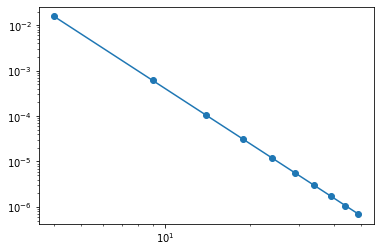

In [45]:
n_grids_eff = np.array(n_grids) - 1
plt.plot(n_grids_eff, errors, marker="o")
plt.xscale('log')
plt.yscale('log')

In [54]:
start_id = 1
end_id = -1
slope = (np.log(errors[start_id])-np.log(errors[end_id]))/(np.log(n_grids_eff[start_id])-np.log(n_grids_eff[end_id]))
slope

-4.000000000000004